# Heart Rate Analysis

### Dylan Picart

## Useful imports

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import json

## Dataset
---
We will be using a dataset with measurements taken from a smart watch in order to evaluate the trend in the sample's heart rate over a period from June through July. Here, we will grab the useful information & clean it to be able to run our analysis to construct our hypotheses, which is that physiological stress and psychological stress are important factors to consider when coming from a more holistic approach to health & wellness.

In [21]:
# Load dataset
df = pd.read_csv('smartwatch.csv')
df.head(10)

,index,source,timestamp,values
0,164349,battery,2017-06-29 07:45:56.262,['98']
1,164350,accelerometer,2017-06-29 07:46:01.263,"['-0.3440857', '0.68330383', '9.967361']"
2,164351,gravity,2017-06-29 07:46:01.324,"['-0.34131828', '0.6573288', '9.778641']"
3,164352,linear_acceleration,2017-06-29 07:46:01.329,"['-0.018068999', '0.034808993', '-0.033065796']"
4,164353,gyroscope,2017-06-29 07:46:01.402,"['0.0041656494', '-0.0132751465', '0.006164551']"
5,164354,pressure,2017-06-29 07:46:01.464,['969.3651']
6,164355,orientation,2017-06-29 07:46:01.509,"['31.284260813896044', '-3.3376453624603086', ..."
7,164356,magnetometer,2017-06-29 07:46:01.661,"['-15.32135', '24.88861', '-44.90509']"
8,164357,rotation_vector,2017-06-29 07:46:01.719,"['0.036942374', '0.007465202', '-0.25660786', ..."
9,164358,heart_rate,2017-06-29 07:46:05.590,"['173.0', '0']"


In [22]:
# Rows, cols, object types, null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200471 entries, 0 to 200470
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   index      200471 non-null  int64 
 1   source     200471 non-null  object
 2   timestamp  200471 non-null  object
 3   values     200471 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB


In [23]:
# Verify null value amt
df.isnull().value_counts()

index  source  timestamp  values
False  False   False      False     200471
dtype: int64

In [24]:
# Amount of measurements within each designated scalar
df.source.value_counts()

heart_rate             91337
orientation            16385
magnetometer           16295
pressure               14900
step_detector          14751
battery                12857
gyroscope               9694
accelerometer           9265
gravity                 4227
linear_acceleration     4224
rotation_vector         4214
step_counter            2322
Name: source, dtype: int64

We will be working predominantly with the sample's heart rate as an indicator of their health status.

In [25]:
# Isolate heart rate data
hr_data = df[(df["source"].str.contains('heart_rate'))]
hr_data = hr_data.drop(columns=['index'])
hr_data

,source,timestamp,values
9,heart_rate,2017-06-29 07:46:05.590,"['173.0', '0']"
16,heart_rate,2017-06-29 07:46:06.590,"['172.0', '1']"
19,heart_rate,2017-06-29 07:46:07.589,"['171.0', '1']"
20,heart_rate,2017-06-29 07:46:09.587,"['170.0', '1']"
21,heart_rate,2017-06-29 07:46:10.588,"['169.0', '1']"
...,...,...,...
200464,heart_rate,2017-07-13 20:21:35.020,"['55.0', '1']"
200465,heart_rate,2017-07-13 20:21:35.060,"['56.0', '1']"
200466,heart_rate,2017-07-13 20:21:35.060,"['56.0', '1']"
200467,heart_rate,2017-07-13 20:21:35.124,"['57.0', '1']"


In [26]:
# We have a list that is in the form of a string in our values feature. Let's convert it so we can grab insigts from it
import ast

In [27]:
# Initialize lists we will use later
bpm = []
other = []

# Iterate over each row in hr_data
for i in range(hr_data.shape[0]):
    # Identify each 'value' in values as variable
    value = hr_data['values'].iloc[i]
    # ast converts the string in the format of what is 'observed'
    value = ast.literal_eval(value)
    # List comprehension to convert our string in x to a float
    v = [float(x) for x in value]
    # Isolate bpm & other value in seperate lists
    bpm.append(v[0]), other.append(v[1])
    
print(bpm)
        

[173.0, 172.0, 171.0, 170.0, 169.0, 168.0, 167.0, 166.0, 165.0, 164.0, 163.0, 162.0, 161.0, 160.0, 159.0, 158.0, 157.0, 156.0, 146.0, 136.0, 132.0, 131.0, 129.0, 128.0, 127.0, 126.0, 125.0, 124.0, 121.0, 120.0, 118.0, 117.0, 114.0, 104.0, 94.0, 84.0, 74.0, 64.0, 63.0, 64.0, 65.0, 68.0, 78.0, 88.0, 98.0, 108.0, 118.0, 126.0, 127.0, 125.0, 124.0, 123.0, 122.0, 121.0, 114.0, 113.0, 112.0, 108.0, 107.0, 102.0, 101.0, 100.0, 99.0, 93.0, 92.0, 87.0, 82.0, 79.0, 78.0, 77.0, 76.0, 75.0, 72.0, 71.0, 70.0, 68.0, 69.0, 72.0, 71.0, 70.0, 71.0, 73.0, 72.0, 69.0, 68.0, 66.0, 65.0, 64.0, 65.0, 66.0, 65.0, 64.0, 63.0, 62.0, 63.0, 64.0, 66.0, 67.0, 66.0, 67.0, 69.0, 71.0, 72.0, 71.0, 70.0, 69.0, 71.0, 72.0, 73.0, 71.0, 70.0, 71.0, 70.0, 71.0, 70.0, 69.0, 64.0, 62.0, 63.0, 62.0, 63.0, 63.0, 63.0, 67.0, 68.0, 67.0, 65.0, 66.0, 65.0, 69.0, 68.0, 67.0, 66.0, 67.0, 68.0, 69.0, 70.0, 69.0, 70.0, 69.0, 65.0, 57.0, 60.0, 61.0, 62.0, 63.0, 65.0, 67.0, 69.0, 67.0, 66.0, 66.0, 66.0, 66.0, 64.0, 63.0, 64.0, 66.0, 

In [28]:
# Create bpm & other features and add into hr_data
hr_data['bpm'] = bpm
hr_data['other'] = other

# Drop values column now that we have our bpm & other cols
hr_data.drop('values', axis=1, inplace=True)

hr_data

,source,timestamp,bpm,other
9,heart_rate,2017-06-29 07:46:05.590,173.0,0.0
16,heart_rate,2017-06-29 07:46:06.590,172.0,1.0
19,heart_rate,2017-06-29 07:46:07.589,171.0,1.0
20,heart_rate,2017-06-29 07:46:09.587,170.0,1.0
21,heart_rate,2017-06-29 07:46:10.588,169.0,1.0
...,...,...,...,...
200464,heart_rate,2017-07-13 20:21:35.020,55.0,1.0
200465,heart_rate,2017-07-13 20:21:35.060,56.0,1.0
200466,heart_rate,2017-07-13 20:21:35.060,56.0,1.0
200467,heart_rate,2017-07-13 20:21:35.124,57.0,1.0


Other is denoted as the status of the heart rate monitor which helps to determine the accuracy.

## Exploratory Data Analysis
---
Here we will begin to map out the trends of our sample's heart rate

In [31]:
# Find hr_data above average heart rate
hr_data[hr_data.bpm > 100]

,source,timestamp,bpm,other
9,heart_rate,2017-06-29 07:46:05.590,173.0,0.0
16,heart_rate,2017-06-29 07:46:06.590,172.0,1.0
19,heart_rate,2017-06-29 07:46:07.589,171.0,1.0
20,heart_rate,2017-06-29 07:46:09.587,170.0,1.0
21,heart_rate,2017-06-29 07:46:10.588,169.0,1.0
...,...,...,...,...
193278,heart_rate,2017-07-13 15:27:09.529,112.0,0.0
193279,heart_rate,2017-07-13 15:27:12.893,111.0,0.0
193280,heart_rate,2017-07-13 15:27:12.893,111.0,0.0
193281,heart_rate,2017-07-13 15:27:13.701,101.0,1.0


There are over 2,000 instances where the sample's heart rate is over 100 bpm, the upper limit to an average person's heart rate. That means that approximately 2.2% of the time the sample's heart rate is above the average, working at a more stressful rate.

In [10]:
font1 = {'family':'serif','color':'navy','size':22}
font2 = {'family':'serif','color':'darkred','size':20}
sns.set(color_codes=True)

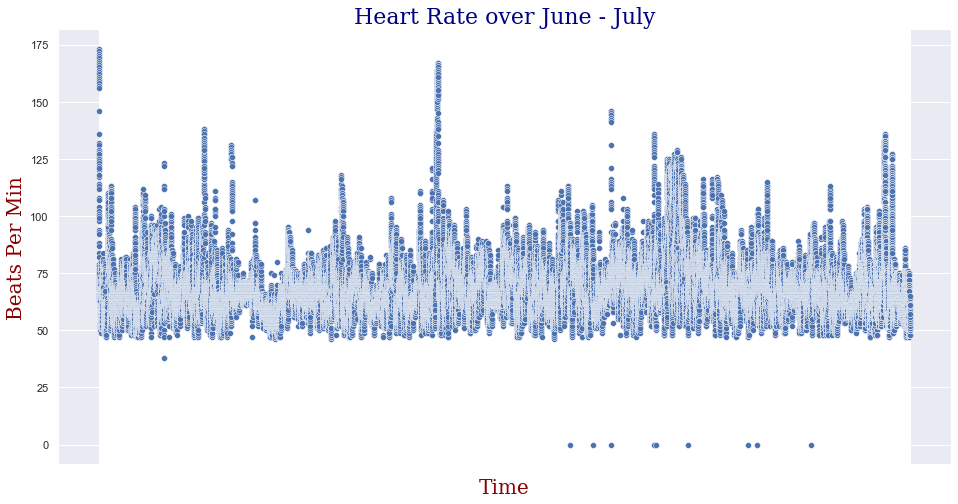

In [14]:
sns.set(rc={"figure.figsize":(16, 8)})
# Using data timestamp but not including into x-axis bc there are too many instances of measurements to visually represent in x-axis ticks
sns.scatterplot(x=hr_data['timestamp'], y=hr_data['bpm'])
plt.title('Heart Rate over June - July', fontdict=font1)
plt.ylabel('Beats Per Min', fontdict=font2), plt.xlabel('Time', fontdict=font2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([]);

Each measurement is in the format of datetime (yr-mo-dy hr:min:s.ms), and is taken within two seconds of each other, giving us a lot of info to map out to observe the trends. 

We can see that this sample has had certain moments of [infrequent] intense activity, due to the elevated heart rate of over 150 bpm. Our outliers near zero can be neglected due to measurement errors in the watch. While > 150 bpm is more rare, it is important to note the frequency in which the sample's heart rate is over 100 bpm, which occurs more often as we can see visually. 

The same representation of this plot is depicted as a line below.

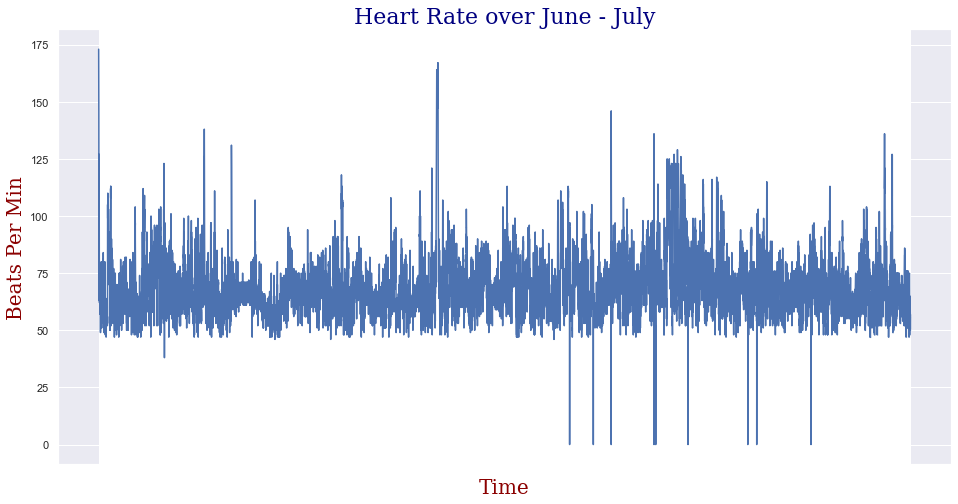

In [13]:
sns.lineplot(x=hr_data['timestamp'], y=hr_data['bpm'])
plt.title('Heart Rate over June - July', fontdict=font1)
plt.ylabel('Beats Per Min', fontdict=font2), plt.xlabel('Time', fontdict=font2)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([]);

The above plots are useful in seeing the patterns of this sample set over a chronological time period.

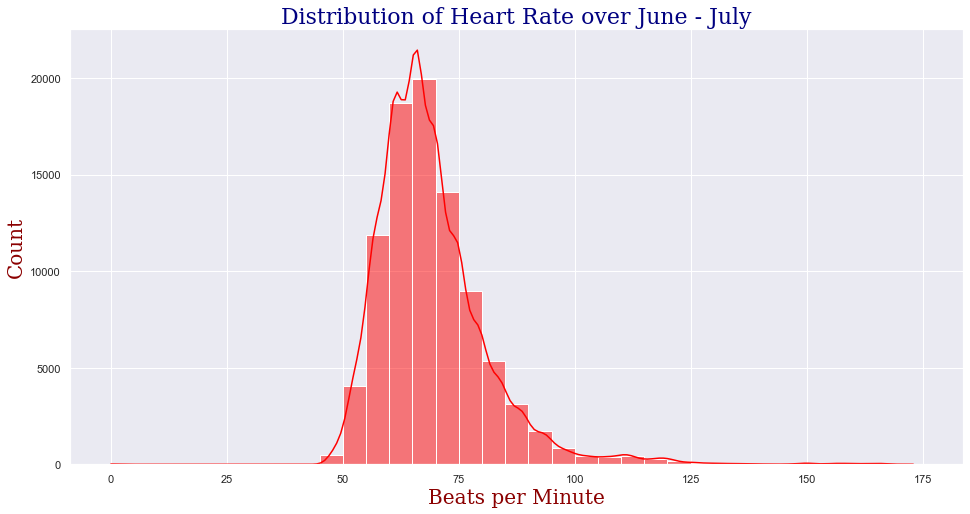

In [ ]:
sns.histplot(data=hr_data, x="bpm", binwidth=5, kde=True, color='red')
plt.title('Distribution of Heart Rate over June - July', fontdict=font1)
plt.xlabel('Beats per Minute', fontdict=font2)
plt.ylabel('Count', fontdict=font2);

We can finally see the trend of our heart rate throughout the sample size with respect to how many measurements were taken at certain heart rate zones. While there are a few outliers with a bpm > 100, with over 17,000 measurements being around 65 - 70 bpm, we can estimate that the average heart rate is around this range. We can also note the steeper drop on the left side of our curve, implying that there are less occurances of our sample's heart rate being below 55 bpm. Contrary to this, there are more times where our sample's heart rate is above their average, which implies a more gradual expression of stress on the sample as opposed to sudden expressions of high stress over time.

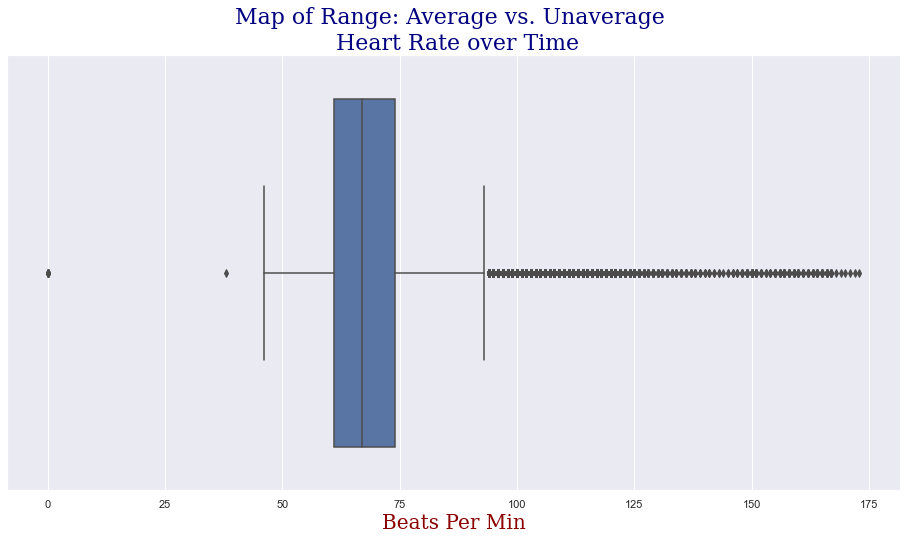

In [35]:
ax = sns.boxplot(x=hr_data["bpm"])
plt.title('Map of Range: Average vs. Unaverage \n Heart Rate over Time', fontdict=font1)
plt.xlabel('Beats Per Min', fontdict=font2);

This sample shows an average heart rate in range of 65-70 bpm. There are more outliers where bpm > 95 than there is where bpm < 50.

## Concluding Hypothesis
---

While the outliers are infrequent relative to the sample's average heart rate, it is important to note that with this amount of stress on the heart, we ought to also consider the daily stresses that we encounter, to ensure that our body is functioning optimally, in order to keep the health of our body (and heart) healthy.